# Best model selection

In [44]:
# Getting MAE for training, validation, and test sets for a linear regression model

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# 1. Cargar dataset
X, y = load_diabetes(return_X_y=True)

# 2. Dividir el dataset en train (60%), validation (20%) y test (20%)
# Primero, separamos train (60%) y temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Ahora separamos temp en val (20%) y test (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Predecir en cada conjunto
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 5. Calcular MAE para cada conjunto
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

# 6. Mostrar resultados
print(f"MAE - Training Set:   {mae_train:.2f}")
print(f"MAE - Validation Set: {mae_val:.2f}")
print(f"MAE - Test Set:       {mae_test:.2f}")

MAE - Training Set:   44.29
MAE - Validation Set: 38.22
MAE - Test Set:       46.72


In [45]:
# Now, let's extend the code to include polynomial regression with a degree of 2

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# 1. Load dataset
X, y = load_diabetes(return_X_y=True)

# 2. Split dataset into train (60%), validation (20%), and test (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 3. Define polynomial degree
degree = 2  # You can change this to try different complexities

# 4. Create pipeline with polynomial features and linear regression
model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('linreg', LinearRegression())
])

# 5. Train the model
model.fit(X_train, y_train)

# 6. Make predictions
y_train_pred = model.predict(X_train)
y_val_pred   = model.predict(X_val)
y_test_pred  = model.predict(X_test)

# 7. Calculate MAE for each dataset
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val   = mean_absolute_error(y_val, y_val_pred)
mae_test  = mean_absolute_error(y_test, y_test_pred)

# 8. Print results
print(f"Polynomial Degree: {degree}")
print(f"MAE - Training Set:   {mae_train:.2f}")
print(f"MAE - Validation Set: {mae_val:.2f}")
print(f"MAE - Test Set:       {mae_test:.2f}")

Polynomial Degree: 2
MAE - Training Set:   38.47
MAE - Validation Set: 47.28
MAE - Test Set:       47.08


In [46]:
# Evaluate polynomial model function

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

def evaluate_polynomial_model(X_train, y_train, X_val, y_val, X_test, y_test, degree):
    """
    Trains a polynomial regression model and returns MAE for train, validation, and test sets.
    """
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)
    y_test_pred  = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)
    mae_test  = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_val, mae_test

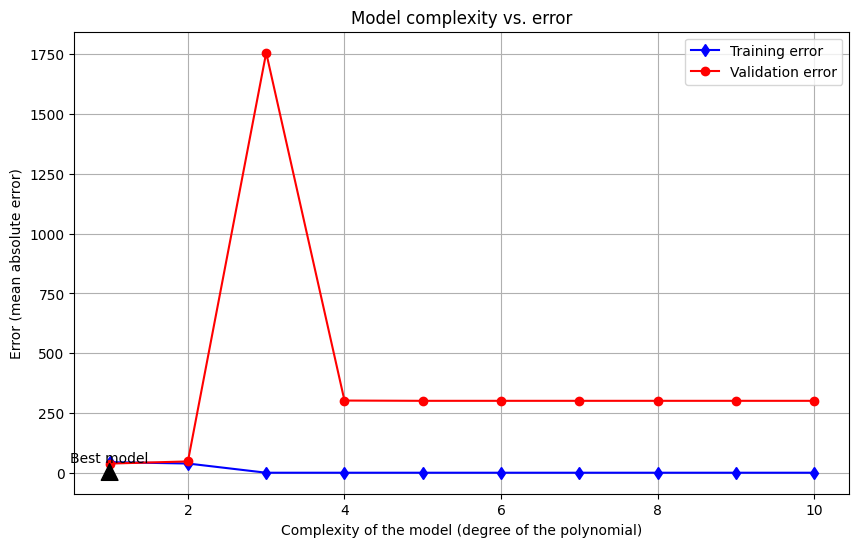

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load and split dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ranges of degrees to test
degrees = range(1, 11)

mae_train_list = []
mae_val_list = []
mae_test_list = []

# Evaluate for each degree
for d in degrees:
    mae_train, mae_val, mae_test = evaluate_polynomial_model(X_train, y_train, X_val, y_val, X_test, y_test, d)
    mae_train_list.append(mae_train)
    mae_val_list.append(mae_val)
    mae_test_list.append(mae_test)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_train_list, 'b-d', label='Training error')
plt.plot(degrees, mae_val_list, 'r-o', label='Validation error')
plt.xlabel("Complexity of the model (degree of the polynomial)")
plt.ylabel("Error (mean absolute error)")
plt.title("Model complexity vs. error")
plt.legend()
plt.grid(True)

# Mark best validation error
# Note that we are assuming the best model is the one with the lowest validation error
# It's better to check the graph to identify the best model (human interpretation)
# If you see, for example, that the model with the smallest validation error is still quite complex, 
# and that there is a much simpler model that has only a slightly higher validation error, you may be more inclined to pick that one. 
# A great data scientist is one who can combine these theoretical tools with their knowledge about the use case to build the best and most effective models.
best_degree = degrees[mae_val_list.index(min(mae_val_list))]
plt.annotate("Best model", 
             xy=(best_degree, min(mae_val_list)), 
             xytext=(best_degree, min(mae_val_list)+5),
             ha='center',
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

The L1 and L2 norm can also be calculated on polynomials by taking either the sum of absolute values or the sum of squares of the coefficients, except for the constant coefficient. Let’s go back to the example at the beginning of this chapter, where our three models were a polynomial of degree 1 (a line), degree 2 (a parabola), and degree 10 (a curve that oscillates 9 times). Imagine that their formulas are the following:

Model 1: ŷ = 2x + 3
Model 2: ŷ = –x2 + 6x – 2
Model 3: ŷ = x9 + 4x8 – 9x7 + 3x6 – 14x5 – 2x4 – 9x3 + x2 + 6x + 10
The L1 and L2 norms are calculated as follows:

L1 norm:

Model 1: |2| = 2
Model 2: |–1| + |6| = 7
Model 3: |1| + |4| + |–9| + |3| + |–14| + |–2| + |–9| + |1| + |6| = 49
L2 norm:

Model 1: 22 = 4
Model 2: (–1)2 + 62 = 37
Model 3: 12 + 42 + (–9)2 + 32 + (–14)2 + (–2)2 + (–9)2 + 12 + 62 = 425

Now that we’ve done most of the heavy lifting, we’ll train a linear regression model using regularization. We have two measures for our model: a measure of performance (the error function) and a measure of complexity (the L1 or L2 norm).


- regression error: A measure of the quality of the model. In this case, it can be the absolute or square errors that we learned in chapter 3.

- regularization: term A measure of the complexity of the model. It can be the L1 or the L2 norm of the model.

The quantity that we want to minimize to find a good and not too complex model is the modified error, defined as the sum of the two, as shown next:

Error = Regression error + Regularization term

Regularization is so common that the models themselves have different names based on what norm is used. If we train our regression model using the L1 norm, the model is called lasso regression. Lasso stands for “least absolute shrinkage and selection operator.” The error function follows:

Lasso regression error = Regression error + L1 norm

If, instead, we train the model using the L2 norm, it is called ridge regression. The name ridge comes from the shape of the error function, because adding the L2 norm term to the regression error function turns a sharp corner into a smooth valley when we plot it. The error function follows:

Ridge regression error = Regression error + L2 norm

However, there is some tug-of-war—trying to make the model perform better may make it more complex, whereas trying to reduce the complexity of the model may make it perform worse. Fortunately, most machine learning techniques come with knobs (hyperparameters) for the data scientist to turn and build the best possible models, and regularization is not an exception. In this section, we see how to use a hyperparameter to regulate between performance and complexity.

This hyperparameter is called the regularization parameter, and its goal is to determine if the model-training process should emphasize performance or simplicity. The regularization parameter is denoted by λ, the Greek letter lambda. We multiply the regularization term by λ, add it to the regression error, and use that result to train our model. The new error becomes the following:

Error = Regression error + λ Regularization term

Picking a value of 0 for λ cancels out the regularization term, and thus we end up with the same regression model we had in chapter 3. Picking a large value for λ results in a simple model, perhaps of low degree, which may not fit our dataset very well. It is crucial to pick a good value for λ, and for this, validation is a useful technique. It is typical to choose powers of 10, such as 10, 1, 0.1, 0.01, but this choice is somewhat arbitrary. Among these, we select the one that makes our model perform best in our validation set.

In [48]:
# Getting the model coefficients
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def model_regulation(X_train, y_train, degree):
    """
    Trains a polynomial regression model and returns MAE for train, validation, and test sets.
    """
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linreg', LinearRegression())
    ])
    
    model.fit(X_train, y_train)

    model_coefficients = model.named_steps['linreg'].coef_
    model_intercept = model.named_steps['linreg'].intercept_    

    l1_norm = sum(abs(model_coefficients))
    l2_norm = sum(coef ** 2 for coef in model_coefficients)

    return l1_norm, l2_norm


In [49]:
# Getting the regularization norms for polynomial degrees 1 to 10
degrees = range(1, 11)

l1_norm = []
l2_norm = []
lambda_ = 1

# Getting the regularization norms for polynomial degrees 1 to 10

for d in degrees:
    l1, l2 = model_regulation(X_train, y_train, d)
    l1_norm.append(l1)
    l2_norm.append(l2)
    mae_plus_lambda_reg_l1 = [mae + lambda_ * reg for mae, reg in zip(mae_val_list, l1_norm)]
    mae_plus_lambda_reg_l2 = [mae + lambda_ * reg for mae, reg in zip(mae_val_list, l2_norm)]


best_regulation_l1 = degrees[mae_plus_lambda_reg_l1.index(min(mae_plus_lambda_reg_l1))]
best_regulation_l2 = degrees[mae_plus_lambda_reg_l2.index(min(mae_plus_lambda_reg_l2))]

print(f"Best degree for L1 regularization: {best_regulation_l1}")
print(f"Best degree for L2 regularization: {best_regulation_l2}")


Best degree for L1 regularization: 1
Best degree for L2 regularization: 1


Best lambda (L1): 0
Best lambda (L2): 0


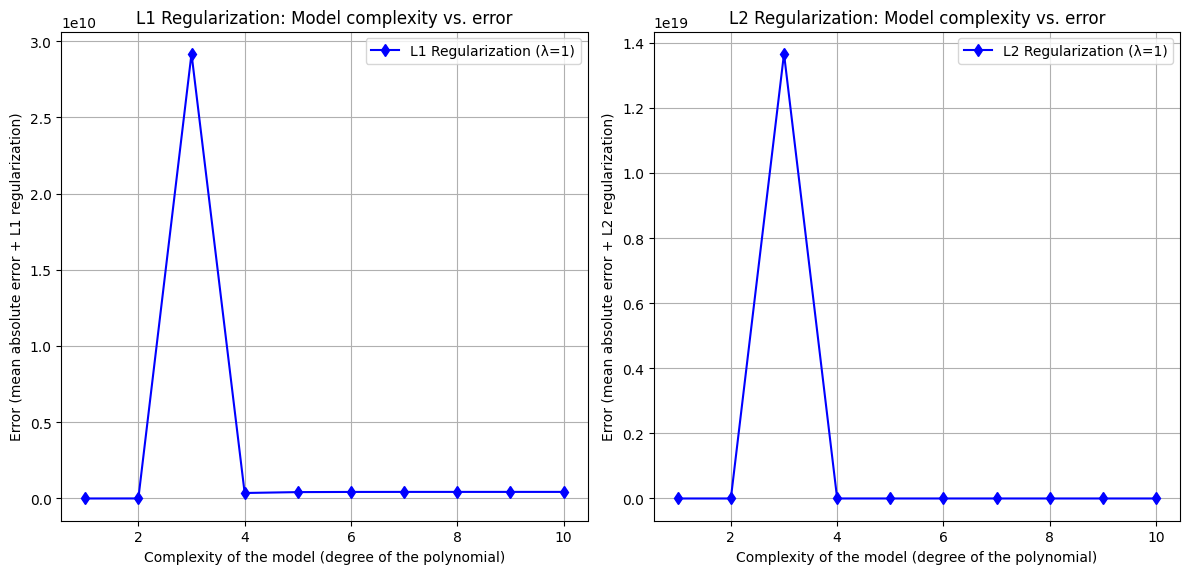

In [50]:
# Error = Regression error + λ Regularization term
# Lower lambda focus more in performance (the error function, y - y_pred)
# Higher lambda focus more in regularization (the L1 or L2 norm, the coefficients complexity)
# lambda_ = 0.1  # Puedes probar con otros valores: 10, 1, 0.1, 0.01, etc.

lambdas = [1, 0, 0.1, 10, 100]

mae_plus_lambda_reg_l1 = []
mae_plus_lambda_reg_l2 = []

for lambda_ in lambdas:
    mae_plus_lambda_reg_l1.append([mae + lambda_ * reg for mae, reg in zip(mae_val_list, l1_norm)])
    mae_plus_lambda_reg_l2.append([mae + lambda_ * reg for mae, reg in zip(mae_val_list, l2_norm)])


best_lambda_ln1 = lambdas[mae_plus_lambda_reg_l1.index(min(mae_plus_lambda_reg_l1))]
best_lambda_ln2 = lambdas[mae_plus_lambda_reg_l2.index(min(mae_plus_lambda_reg_l2))]


print(f"Best lambda (L1): {best_lambda_ln1}")
print(f"Best lambda (L2): {best_lambda_ln2}")


# Plotting the results for L1 and L2 regularization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) 
plt.plot(degrees, mae_plus_lambda_reg_l1[0], 'b-d', label=f"L1 Regularization (λ={lambdas[0]})")
# plt.plot(degrees, mae_plus_lambda_reg_l1[1], 'r-o', label=f"L1 Regularization (λ={lambdas[1]})")
# plt.plot(degrees, mae_plus_lambda_reg_l1[2], 'g-s', label=f"L1 Regularization (λ={lambdas[2]})")
# plt.plot(degrees, mae_plus_lambda_reg_l1[3], 'm-x', label=f"L1 Regularization (λ={lambdas[3]})")
# plt.plot(degrees, mae_plus_lambda_reg_l1[4], 'c-^', label=f"L1 Regularization (λ={lambdas[4]})")
plt.xlabel("Complexity of the model (degree of the polynomial)")
plt.ylabel("Error (mean absolute error + L1 regularization)")
plt.title("L1 Regularization: Model complexity vs. error")
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(degrees, mae_plus_lambda_reg_l2[0], 'b-d', label=f"L2 Regularization (λ={lambdas[0]})")
# plt.plot(degrees, mae_plus_lambda_reg_l2[1], 'r-o', label=f"L2 Regularization (λ={lambdas[1]})")
# plt.plot(degrees, mae_plus_lambda_reg_l2[2], 'g-s', label=f"L2 Regularization (λ={lambdas[2]})")
# plt.plot(degrees, mae_plus_lambda_reg_l2[3], 'm-x', label=f"L2 Regularization (λ={lambdas[3]})")
# plt.plot(degrees, mae_plus_lambda_reg_l2[4], 'c-^', label=f"L2 Regularization (λ={lambdas[4]})")
plt.xlabel("Complexity of the model (degree of the polynomial)")
plt.ylabel("Error (mean absolute error + L2 regularization)")
plt.title("L2 Regularization: Model complexity vs. error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Let’s go back to our movie recommendation example, where we are building a regression model to predict the amount of time (in seconds) that a user will watch a movie, given the time that same user has watched 10 different movies. Imagine that we’ve trained the model, and the equation we get is the following:

Model: ŷ = 22x1 – 103x2 – 14x3 + 109x4 – 93x5 + 203x6 + 87x7 – 55x8 + 378x9 – 25x10 + 8

If we add regularization and train the model again, we end up with a simpler model. The following two properties can be shown mathematically:

If we use L1 regularization (lasso regression), you end up with a model with fewer coefficients. In other words, L1 regularization turns some of the coefficients into zero. Thus, we may end up with an equation like ŷ = 2x3 + 1.4x7 – 0.5x9 + 8.
If we use L2 regularization (ridge regression), we end up with a model with smaller coefficients. In other words, L2 regularization shrinks all the coefficients but rarely turns them into zero. Thus, we may end up with an equation like ŷ = 0.2x1 – 0.8x2 – 1.1x3 + 2.4x4 – 0.03x5 + 1.02x6 + 3.1x7 – 2x8 + 2.9x9 – 0.04x10 + 8.
Thus, depending on what kind of equation we want to get, we can decide between using L1 and L2 regularization.

A quick rule of thumb to use when deciding if we want to use L1 or L2 regularization follows: if we have too many features and we’d like to get rid of most of them, L1 regularization is perfect for that. If we have only few features and believe they are all relevant, then L2 regularization is what we need, because it won’t get rid of our useful features.

An intuitive way to see regularization

Pseudocode for the linear regression algorithm

Inputs: A dataset of points

Outputs: A linear regression model that fits that dataset

Procedure:

Procedure:

- Pick a model with random weights and a random bias.
- Repeat many times:
  + Pick a random data point.
  + Slightly adjust the weights and bias to improve the prediction for that particular data point.
  + Slightly shrink the coefficients using method 1 or method 2.
Enjoy your model!

Method 1: Subtract λ from each of the positive parameters, and add λ to each of the negative parameters. If they are zero, leave them alone.

Method 2: Multiply all of them by 1 – λ. Notice that this number is close to 1, because λ is small.

Using method 1, we get the numbers 2.99, 9.99, and 17.99.

Using method 2, we get the numbers 2.97, 9.9, and 17.82.

If we use method 1, we are training the model with L1 regularization, or lasso regression. If we use method 2, we are training it with L2 regularization, or ridge regression.

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge  # Cambiamos LinearRegression por Ridge para L2
from sklearn.metrics import mean_absolute_error

def evaluate_polynomial_model_with_ridge(X_train, y_train, X_val, y_val, X_test, y_test, degree, alpha=1.0):
    """
    Trains a polynomial regression model with L2 regularization and returns MAE for train, validation, and test sets.
    
    Parameters:
    alpha: float, regularization strength (larger values mean more regularization)
    """
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('ridge', Ridge(alpha=alpha))  # Usamos Ridge en lugar de LinearRegression
    ])
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_val, mae_test


Degree: 1, Alpha: 0.001, Train MAE: 44.29, Val MAE: 38.26, Test MAE: 46.76
Degree: 1, Alpha: 0.01, Train MAE: 44.35, Val MAE: 38.40, Test MAE: 46.87
Degree: 1, Alpha: 0.1, Train MAE: 44.91, Val MAE: 39.07, Test MAE: 46.76
Degree: 1, Alpha: 1, Train MAE: 50.51, Val MAE: 47.54, Test MAE: 50.13
Degree: 1, Alpha: 10, Train MAE: 60.80, Val MAE: 62.27, Test MAE: 62.06
Degree: 1, Alpha: 100, Train MAE: 64.17, Val MAE: 66.90, Test MAE: 66.17
Degree: 2, Alpha: 0.001, Train MAE: 40.93, Val MAE: 37.74, Test MAE: 44.47
Degree: 2, Alpha: 0.01, Train MAE: 43.05, Val MAE: 38.17, Test MAE: 46.05
Degree: 2, Alpha: 0.1, Train MAE: 44.67, Val MAE: 39.04, Test MAE: 46.64
Degree: 2, Alpha: 1, Train MAE: 50.48, Val MAE: 47.53, Test MAE: 50.11
Degree: 2, Alpha: 10, Train MAE: 60.79, Val MAE: 62.27, Test MAE: 62.06
Degree: 2, Alpha: 100, Train MAE: 64.17, Val MAE: 66.90, Test MAE: 66.17
Degree: 3, Alpha: 0.001, Train MAE: 40.83, Val MAE: 37.87, Test MAE: 44.39
Degree: 3, Alpha: 0.01, Train MAE: 43.03, Val MAE

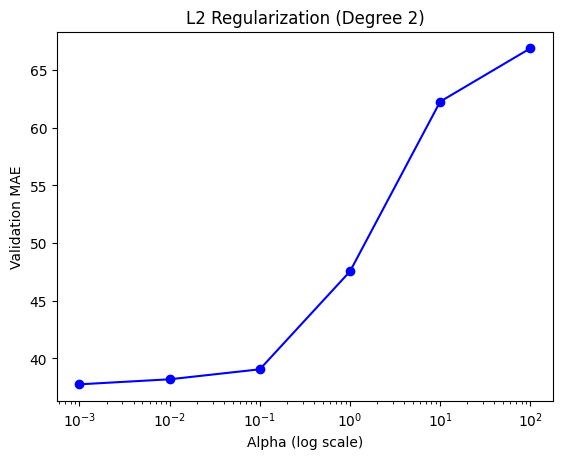

In [56]:
#  Usin Ridge regression to evaluate polynomial models with different degrees and regularization strengths

import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load and split dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ranges of degrees to test
degrees = range(1, 11)
alphas = [0.001, 0.01, 0.1, 1, 10, 100]  # Diferentes valores de alpha para probar

# Evaluar para cada grado y alpha
best_degree = None
best_alpha = None
best_mae_val = float('inf')

for d in degrees:
    for alpha in alphas:
        mae_train, mae_val, mae_test = evaluate_polynomial_model_with_ridge(
            X_train, y_train, X_val, y_val, X_test, y_test, d, alpha)
        
        print(f"Degree: {d}, Alpha: {alpha}, Train MAE: {mae_train:.2f}, Val MAE: {mae_val:.2f}, Test MAE: {mae_test:.2f}")
        
        if mae_val < best_mae_val:
            best_mae_val = mae_val
            best_degree = d
            best_alpha = alpha

print(f"\nBest model - Degree: {best_degree}, Alpha: {best_alpha}, Validation MAE: {best_mae_val:.2f}")

# Opcional: Visualización para un degree fijo
fixed_degree = 2
mae_values = []

for alpha in alphas:
    mae_train, mae_val, _ = evaluate_polynomial_model_with_ridge(
        X_train, y_train, X_val, y_val, X_test, y_test, fixed_degree, alpha)
    mae_values.append(mae_val)

plt.plot(alphas, mae_values, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Validation MAE')
plt.title(f'L2 Regularization (Degree {fixed_degree})')
plt.show()

In [ ]:
# Using Lasso regression to evaluate polynomial models with different degrees and regularization strengths

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso  # Cambiamos a Lasso para L1 regularization
from sklearn.metrics import mean_absolute_error

def evaluate_polynomial_model_with_lasso(X_train, y_train, X_val, y_val, X_test, y_test, degree, alpha=1.0):
    """
    Trains a polynomial regression model with L1 regularization and returns MAE for train, validation, and test sets.
    
    Parameters:
    alpha: float, regularization strength (larger values mean more regularization)
    """
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('lasso', Lasso(alpha=alpha, max_iter=10000))  # Aumentamos max_iter para convergencia
    ])
    
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mae_train, mae_val, mae_test

Degree: 1, Alpha: 0.0001, Train MAE: 44.29, Val MAE: 38.22, Test MAE: 46.73
Degree: 1, Alpha: 0.0010, Train MAE: 44.28, Val MAE: 38.24, Test MAE: 46.75
Degree: 1, Alpha: 0.0100, Train MAE: 44.34, Val MAE: 38.38, Test MAE: 47.00
Degree: 1, Alpha: 0.1000, Train MAE: 44.90, Val MAE: 39.31, Test MAE: 47.37
Degree: 1, Alpha: 1.0000, Train MAE: 53.29, Val MAE: 51.35, Test MAE: 53.55
Degree: 1, Alpha: 10.0000, Train MAE: 64.66, Val MAE: 67.52, Test MAE: 66.73
Degree: 2, Alpha: 0.0001, Train MAE: 38.73, Val MAE: 44.58, Test MAE: 43.91
Degree: 2, Alpha: 0.0010, Train MAE: 39.63, Val MAE: 40.39, Test MAE: 43.44
Degree: 2, Alpha: 0.0100, Train MAE: 42.63, Val MAE: 37.79, Test MAE: 45.93
Degree: 2, Alpha: 0.1000, Train MAE: 44.90, Val MAE: 39.31, Test MAE: 47.37
Degree: 2, Alpha: 1.0000, Train MAE: 53.29, Val MAE: 51.35, Test MAE: 53.55
Degree: 2, Alpha: 10.0000, Train MAE: 64.66, Val MAE: 67.52, Test MAE: 66.73


c:\Users\luis.bolanoss\Documents\Labs\repositories\supervised-machine-learning\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+05, tolerance: 1.585e+02
  model = cd_fast.enet_coordinate_descent(


Degree: 3, Alpha: 0.0001, Train MAE: 33.01, Val MAE: 51.46, Test MAE: 47.51
Degree: 3, Alpha: 0.0010, Train MAE: 39.55, Val MAE: 40.57, Test MAE: 43.26
Degree: 3, Alpha: 0.0100, Train MAE: 42.63, Val MAE: 37.79, Test MAE: 45.93
Degree: 3, Alpha: 0.1000, Train MAE: 44.90, Val MAE: 39.31, Test MAE: 47.37
Degree: 3, Alpha: 1.0000, Train MAE: 53.29, Val MAE: 51.35, Test MAE: 53.55
Degree: 3, Alpha: 10.0000, Train MAE: 64.66, Val MAE: 67.52, Test MAE: 66.73
Degree: 4, Alpha: 0.0001, Train MAE: 33.01, Val MAE: 51.46, Test MAE: 47.51
Degree: 4, Alpha: 0.0010, Train MAE: 39.55, Val MAE: 40.57, Test MAE: 43.26
Degree: 4, Alpha: 0.0100, Train MAE: 42.63, Val MAE: 37.79, Test MAE: 45.93
Degree: 4, Alpha: 0.1000, Train MAE: 44.90, Val MAE: 39.31, Test MAE: 47.37
Degree: 4, Alpha: 1.0000, Train MAE: 53.29, Val MAE: 51.35, Test MAE: 53.55
Degree: 4, Alpha: 10.0000, Train MAE: 64.66, Val MAE: 67.52, Test MAE: 66.73
Degree: 5, Alpha: 0.0001, Train MAE: 33.01, Val MAE: 51.46, Test MAE: 47.51
Degree: 5,

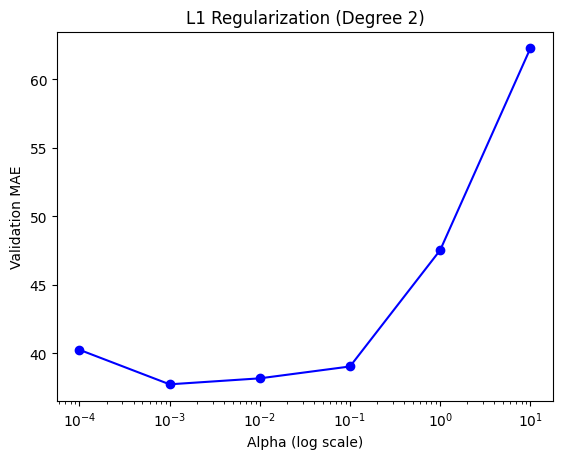

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load and split dataset
X, y = load_diabetes(return_X_y=True)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Ranges of degrees to test
degrees = range(1, 6)  # Con L1, grados altos pueden ser problemáticos
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10]  # Alpha necesita valores más pequeños que con L2

# Evaluar para cada grado y alpha
best_degree = None
best_alpha = None
best_mae_val = float('inf')

for d in degrees:
    for alpha in alphas:
        mae_train, mae_val, mae_test = evaluate_polynomial_model_with_lasso(
            X_train, y_train, X_val, y_val, X_test, y_test, d, alpha)
        
        print(f"Degree: {d}, Alpha: {alpha:.4f}, Train MAE: {mae_train:.2f}, Val MAE: {mae_val:.2f}, Test MAE: {mae_test:.2f}")
        
        if mae_val < best_mae_val:
            best_mae_val = mae_val
            best_degree = d
            best_alpha = alpha

print(f"\nBest model - Degree: {best_degree}, Alpha: {best_alpha:.4f}, Validation MAE: {best_mae_val:.2f}")

# Opcional: Visualización para un degree fijo
fixed_degree = 2
mae_values = []

for alpha in alphas:
    mae_train, mae_val, _ = evaluate_polynomial_model_with_lasso(
        X_train, y_train, X_val, y_val, X_test, y_test, fixed_degree, alpha)
    mae_values.append(mae_val)

plt.plot(alphas, mae_values, 'bo-')
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Validation MAE')
plt.title(f'L1 Regularization (Degree {fixed_degree})')
plt.show()